In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

meat = pd.read_csv('Resources/meat_consumption.csv')
meat.head()

,Year,Beef_Veal,Lamb_Mutton,Pig,Chicken
0,1974,63,25,10,12
1,1975,67,22,10,13
2,1976,69,18,10,14
3,1977,67,18,11,15
4,1978,57,18,10,17


In [3]:
# Assign the data to X and y

y = meat[["Beef_Veal", "Lamb_Mutton", "Pig", "Chicken"]]
X = meat["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(44, 1) (44, 4)


In [4]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### END SOLUTION

In [5]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [6]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8638942902549378
Testing Score: 0.7465107766482549


Text(0.5, 1.0, 'Residual Plot')

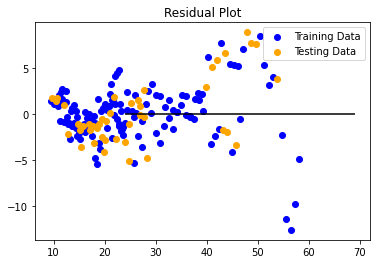

In [7]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [8]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-0.85275624]
 [-0.32578775]
 [ 0.39984629]
 [ 0.81894082]]
y-axis intercept:  [ 1741.44742542   666.5216237   -778.42667505 -1605.31593656]


In [9]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1974]]
Max X Value: [[2017]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict([[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027]])
### END SOLUTION
y_max

array([[20.585342  ,  9.08195347, 28.46314539, 47.30664431],
       [19.73258576,  8.75616572, 28.86299169, 48.12558513],
       [18.87982953,  8.43037798, 29.26283798, 48.94452596],
       [18.02707329,  8.10459023, 29.66268427, 49.76346678],
       [17.17431705,  7.77880249, 30.06253057, 50.5824076 ],
       [16.32156082,  7.45301474, 30.46237686, 51.40134842],
       [15.46880458,  7.127227  , 30.86222315, 52.22028925],
       [14.61604835,  6.80143925, 31.26206945, 53.03923007],
       [13.76329211,  6.47565151, 31.66191574, 53.85817089],
       [12.91053588,  6.14986376, 32.06176203, 54.67711172]])

In [11]:
predicted_df = pd.DataFrame(y_max)
predicted_df.head()

,0,1,2,3
0,20.585342,9.081953,28.463145,47.306644
1,19.732586,8.756166,28.862992,48.125585
2,18.879830,8.430378,29.262838,48.944526
3,18.027073,8.104590,29.662684,49.763467
4,17.174317,7.778802,30.062531,50.582408


In [12]:
predicted_df ['Year'] = [2018,2019,2020,2021,2022,2023,2024,2025,2026,2027]
predicted_df

,0,1,2,3,Year
0,20.585342,9.081953,28.463145,47.306644,2018
1,19.732586,8.756166,28.862992,48.125585,2019
2,18.879830,8.430378,29.262838,48.944526,2020
3,18.027073,8.104590,29.662684,49.763467,2021
4,17.174317,7.778802,30.062531,50.582408,2022
5,16.321561,7.453015,30.462377,51.401348,2023
6,15.468805,7.127227,30.862223,52.220289,2024
7,14.616048,6.801439,31.262069,53.039230,2025
8,13.763292,6.475652,31.661916,53.858171,2026
9,12.910536,6.149864,32.061762,54.677112,2027


In [13]:
first_col = predicted_df.pop("Year")
predicted_df.insert(0, "Year", first_col)
predicted_df

,Year,0,1,2,3
0,2018,20.585342,9.081953,28.463145,47.306644
1,2019,19.732586,8.756166,28.862992,48.125585
2,2020,18.879830,8.430378,29.262838,48.944526
3,2021,18.027073,8.104590,29.662684,49.763467
4,2022,17.174317,7.778802,30.062531,50.582408
5,2023,16.321561,7.453015,30.462377,51.401348
6,2024,15.468805,7.127227,30.862223,52.220289
7,2025,14.616048,6.801439,31.262069,53.039230
8,2026,13.763292,6.475652,31.661916,53.858171
9,2027,12.910536,6.149864,32.061762,54.677112


In [14]:
# Rename the column headers
predicted_df = predicted_df.rename(columns={"Year": "Year",0: "Beef_Veal",
                                                          1: "Lamb_Mutton",
                                                          2:"Pig",
                                                          3: "Chicken"})
predicted_df

,Year,Beef_Veal,Lamb_Mutton,Pig,Chicken
0,2018,20.585342,9.081953,28.463145,47.306644
1,2019,19.732586,8.756166,28.862992,48.125585
2,2020,18.879830,8.430378,29.262838,48.944526
3,2021,18.027073,8.104590,29.662684,49.763467
4,2022,17.174317,7.778802,30.062531,50.582408
5,2023,16.321561,7.453015,30.462377,51.401348
6,2024,15.468805,7.127227,30.862223,52.220289
7,2025,14.616048,6.801439,31.262069,53.039230
8,2026,13.763292,6.475652,31.661916,53.858171
9,2027,12.910536,6.149864,32.061762,54.677112


In [15]:
predicted_df.to_csv('Resources/predcited_meat_consumption.csv',index = False, header=True)